In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [51]:
df = pd.read_csv('Diwali Sales Data.csv', encoding='unicode_escape')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [52]:
df.shape

(11251, 15)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [54]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [55]:
df.drop(['Status','unnamed1'], axis=1, inplace=True)

In [56]:
df.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [57]:
df.dropna(inplace=True)

In [58]:
df['Amount'] = df['Amount'].astype('int64')

In [59]:
df.to_csv('diwali_cleaned.csv', index=False)

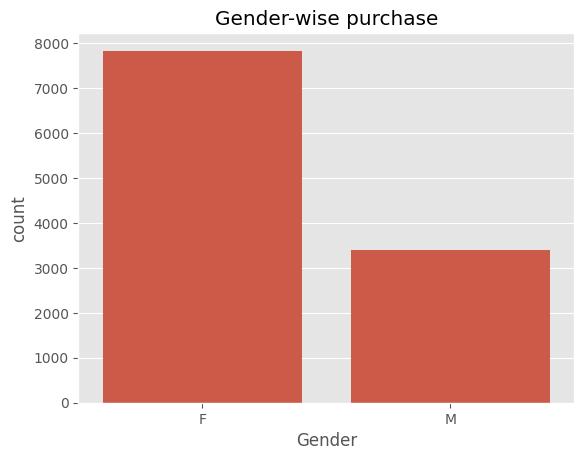

In [49]:
sns.countplot(x='Gender', data=df)
plt.title("Gender-wise purchase")
plt.show()

In [60]:
age_sales = df.groupby('Age Group')['Amount'].sum().reset_index()

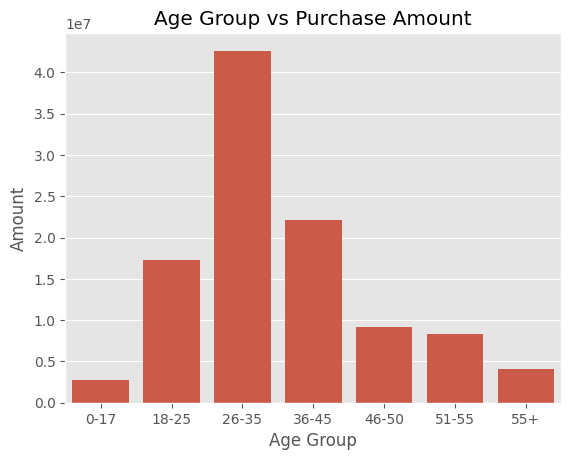

In [61]:
sns.barplot(x='Age Group', y='Amount', data=age_sales)
plt.title("Age Group vs Purchase Amount")
plt.show()

In [62]:
state_sales = df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10)

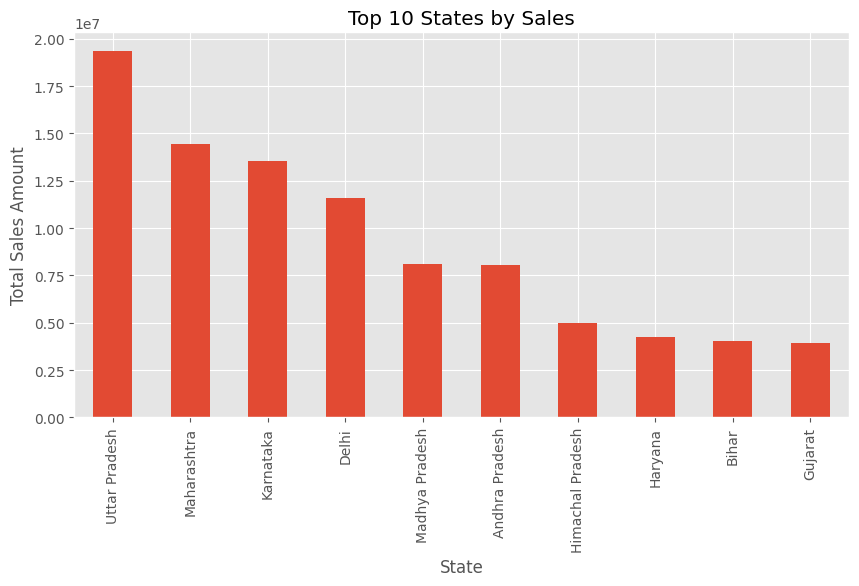

In [63]:
state_sales.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 States by Sales")
plt.ylabel("Total Sales Amount")
plt.show()

In [64]:
occ_sales = df.groupby('Occupation')['Amount'].sum().sort_values(ascending=False)

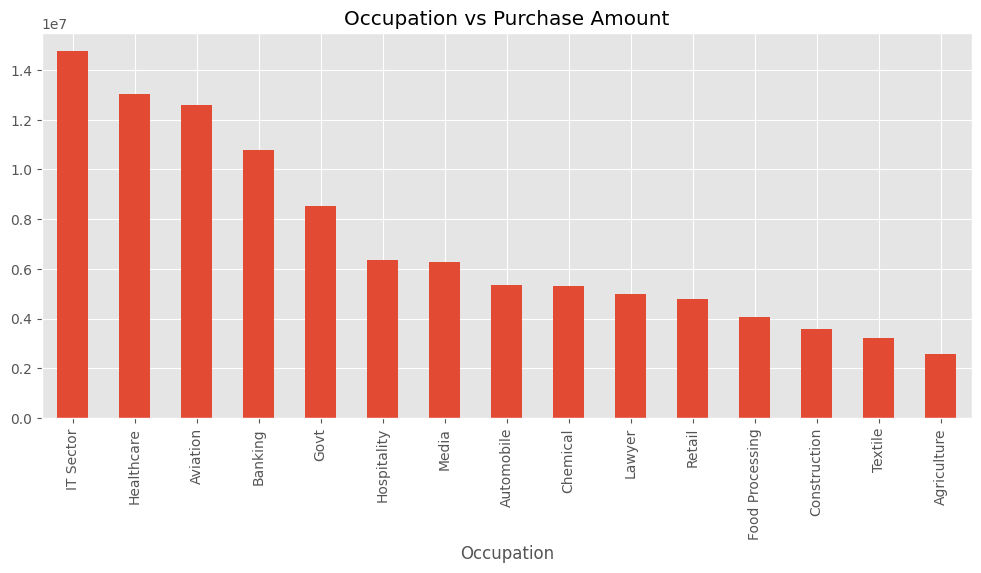

In [65]:
occ_sales.plot(kind='bar', figsize=(12,5))
plt.title("Occupation vs Purchase Amount")
plt.show()

In [66]:
cat_sales = df.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False)

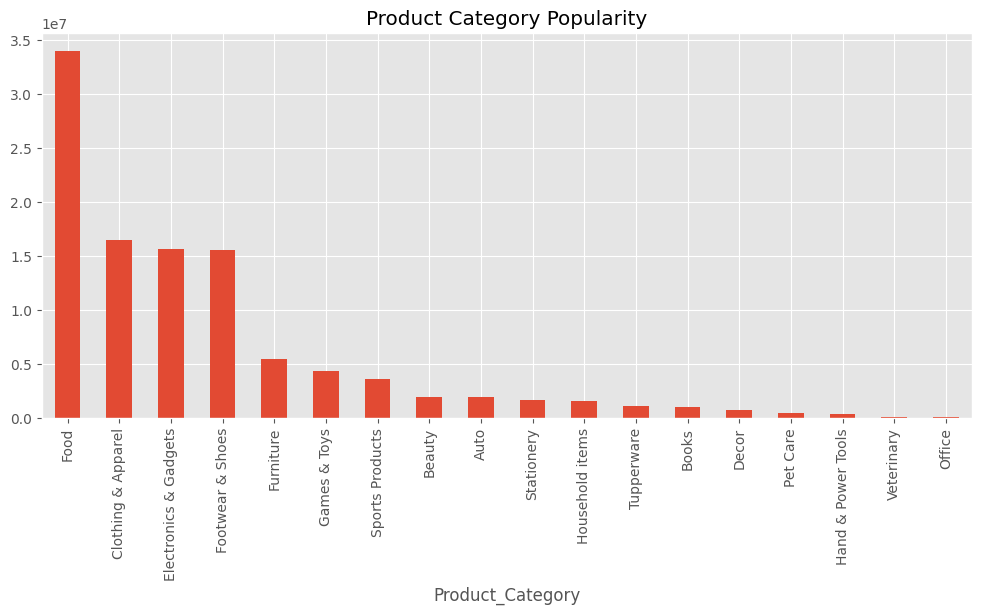

In [67]:
cat_sales.plot(kind='bar', figsize=(12,5))
plt.title("Product Category Popularity")
plt.show()

In [68]:
marital_sales = df.groupby('Marital_Status')['Amount'].sum().reset_index()

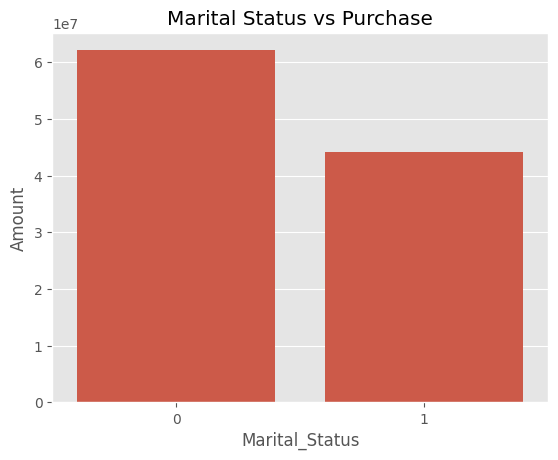

In [69]:
sns.barplot(x='Marital_Status', y='Amount', data=marital_sales)
plt.title("Marital Status vs Purchase")
plt.show()

In [70]:
avg_cat = df.groupby('Product_Category')['Amount'].mean().sort_values(ascending=False)

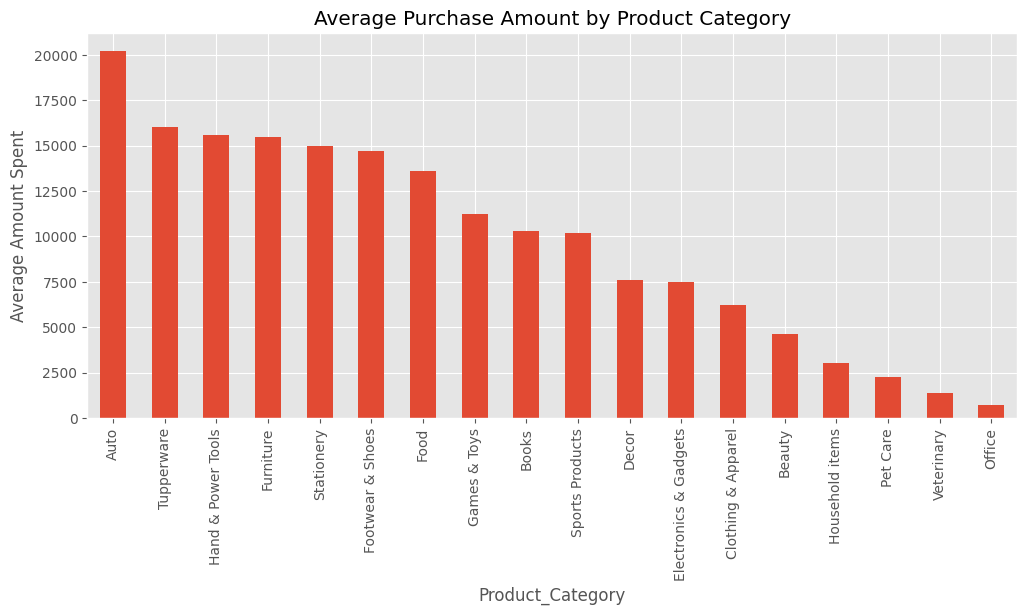

In [71]:
avg_cat.plot(kind='bar', figsize=(12,5))
plt.title("Average Purchase Amount by Product Category")
plt.ylabel("Average Amount Spent")
plt.show()

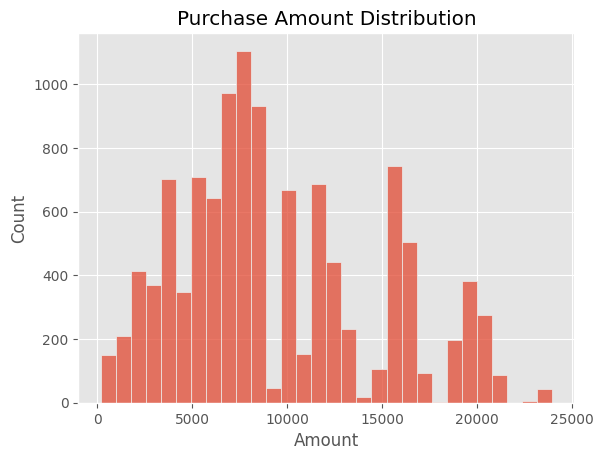

In [72]:
sns.histplot(df['Amount'], bins=30)
plt.title("Purchase Amount Distribution")
plt.show()

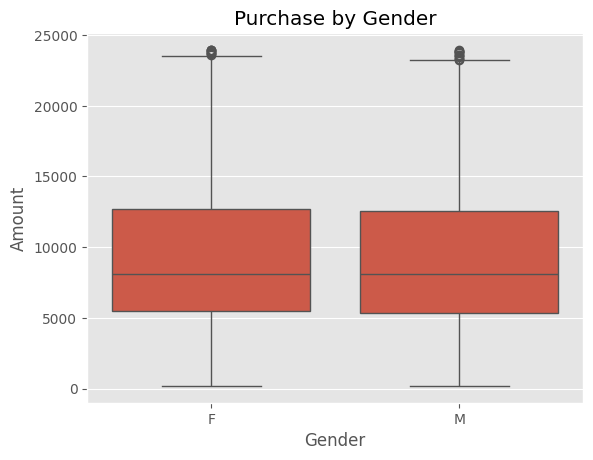

In [73]:
sns.boxplot(x='Gender', y='Amount', data=df)
plt.title("Purchase by Gender")
plt.show()

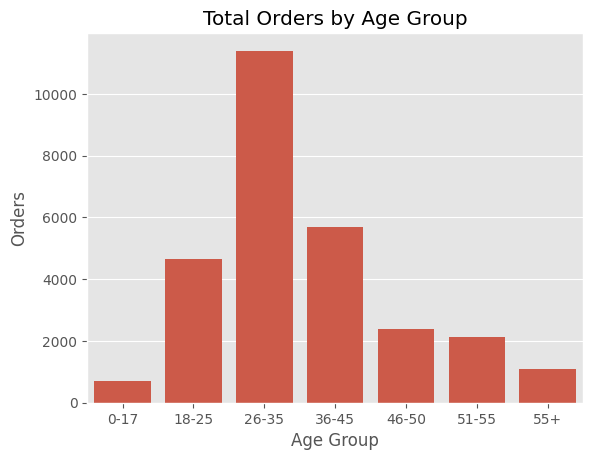

In [74]:
order_age = df.groupby('Age Group')['Orders'].sum().reset_index()
sns.barplot(x='Age Group', y='Orders', data=order_age)
plt.title("Total Orders by Age Group")
plt.show()